# Course Machine Learning for Particle Physicists
##  PhD course Spring 2020
## Example III : Clustering and PCA
###  by Veronica Sanz (Universitat de Valencia/ IFIC)


In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
# bigger fonts
plt.rcParams['font.size'] = 18

### Import keras bits and pieces from tensorflow

In [0]:
# if you have a recent version of tensorflow, keras is included
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import RMSprop
from sklearn import decomposition
from sklearn import datasets
from sklearn import ensemble 
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

### Standard dataset: MNIST handwritten digits

![MNIST](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png "MNIST")



In [10]:
from sklearn.datasets import load_digits
#load_digits is a python dictionary
#set of (key, value) pair
digits = load_digits()
digits.keys()
#print(digits)
#digits.data.shape
#data is a 1D array of pixels of the image

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

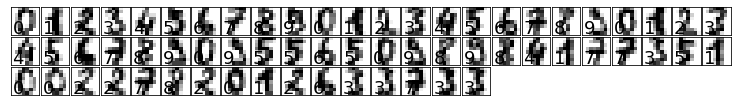

In [11]:
# set up the figure
fig = plt.figure(figsize=(10, 10))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(24, 24, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

In [14]:
digits.images[1] #image is 2D 8**
#digits.data[1].shape


array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

Here a few lines to do a Random Forest classifier on the data

This is still a supervised method!

In [16]:
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,
                                                random_state=0)
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
print(ytest[10], ypred[10])

2 2


In [18]:
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.98      0.98      0.98        43
           2       0.95      1.00      0.98        42
           3       0.98      0.96      0.97        46
           4       0.97      1.00      0.99        37
           5       0.98      0.96      0.97        49
           6       1.00      1.00      1.00        52
           7       1.00      0.96      0.98        50
           8       0.94      0.98      0.96        46
           9       0.98      0.98      0.98        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



#### Unsupervised learning using K-means


Projecting 64-dimensional data to 2D


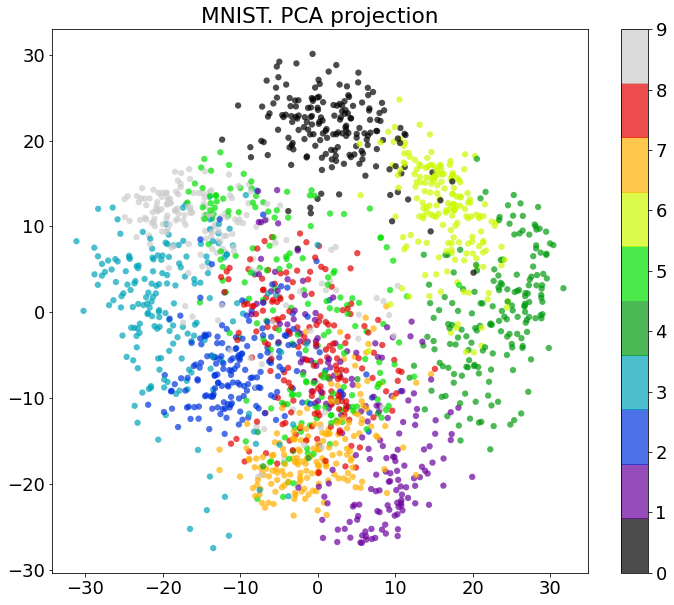

In [25]:
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import accuracy_score, roc_auc_score

pca = decomposition.PCA(n_components=2)
#n_com is the dimension of the latent space
# no of principal component after dim. reduction
X = digits.data
y = digits.target
X_reduced = pca.fit_transform(X)

print('Projecting %d-dimensional data to 2D' % X.shape[1])

plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1],   c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
# X_reduced[:, 0] is the first column of the rduced data
plt.colorbar()
plt.title('MNIST. PCA projection');

In [76]:
kmeans = KMeans(n_clusters=10, random_state=0)
#n_cluster = 10 coj we want 10 classes, in real data we dont know how many clusters we want
clusters = kmeans.fit_predict(digits.data) #digits.data is 64 dimensional
kmeans.cluster_centers_.shape
#kmeans.cluster_centers_[0]
print(digits.data.shape)
print(clusters.shape)

(1797, 64)
(1797,)


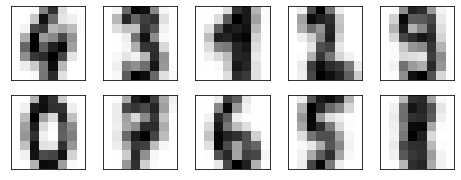

In [61]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)

for axi, center in zip(ax.flat, centers): # printing the prediction of 10 clusters #zip(a,b)
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

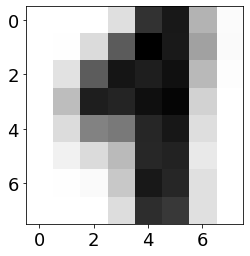

In [65]:
centers = kmeans.cluster_centers_.reshape(10, 8, 8) #center is the output of 10 clusters of 8*8 array
plt.imshow(centers[2], cmap=plt.cm.binary)
plt.show() 

*The* clustering algorithm does not know about the labels 0,1,2,... but we can check the accuracy of the clustering by mapping the elements of the cluster with their true (known) labels 

In [0]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
#labels has same len as clusters with all element zero
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]


In [80]:
print(clusters) # total 
print(clusters.shape)
print(clusters == i)
print(i)

[5 9 9 ... 9 4 4]
(1797,)
[False  True  True ...  True False False]
9


In [82]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7952142459654981

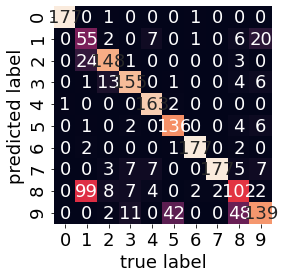

In [84]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

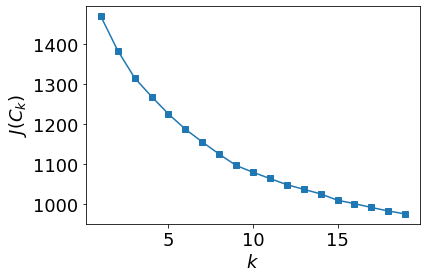

In [85]:

inertia = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(digits.data)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 20), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

[link text](https://)###  Now, to improve performance we use t-SNE

CPU times: user 18 s, sys: 95.5 ms, total: 18.1 s
Wall time: 9.43 s


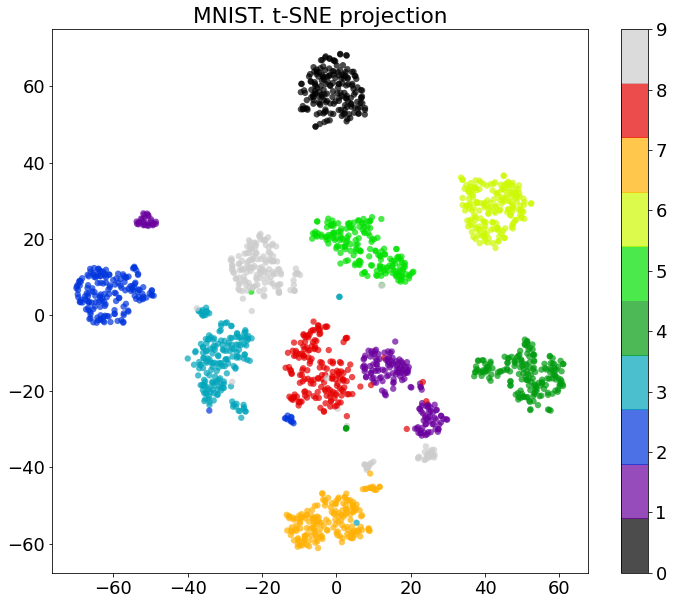

In [27]:
%%time

from sklearn.manifold import TSNE
tsne = TSNE(random_state=17)

X_tsne = tsne.fit_transform(digits.data)

plt.figure(figsize=(12,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=digits.target, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. t-SNE projection');

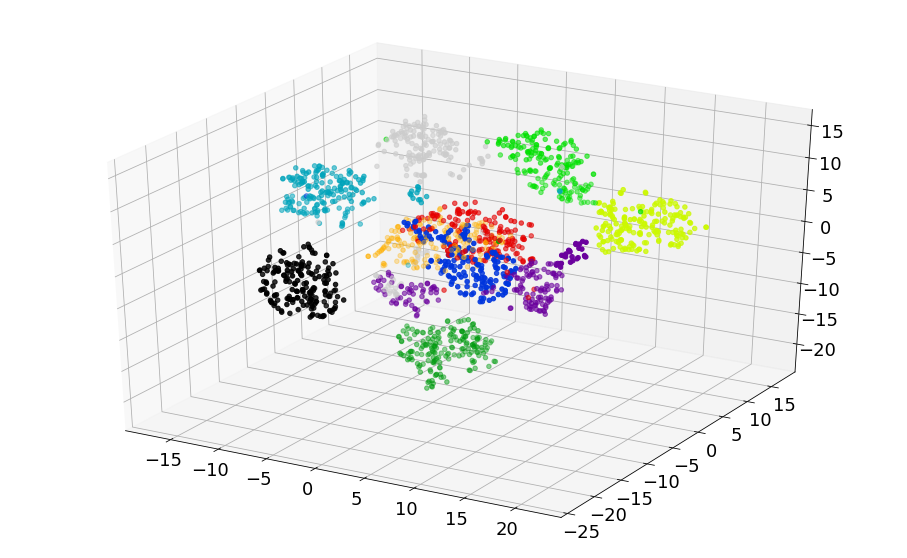

In [28]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3, n_jobs=5).fit_transform(digits.data)

ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=tsne[:, 0], 
    ys=tsne[:, 1], 
    zs=tsne[:, 2], 
    c=digits.target, 
    cmap=plt.cm.get_cmap('nipy_spectral', 10)
)
plt.show()


In [94]:
from sklearn.manifold import TSNE

# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# Compute the clusters
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# Permute the labels
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]
print(digits.target.shape)
print(labels.shape)
# Compute the accuracy
accuracy_score(digits.target, labels)

(1797,)
(1797,)


0.9371174179187535

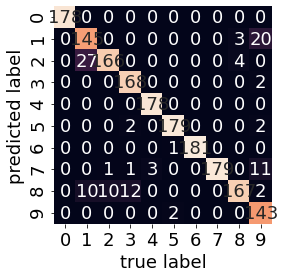

In [87]:
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');


## HOMEWORK

Try unsupervised classification with another problem.

This is a fun one:

https://www.kaggle.com/kashnitsky/a7-demo-unsupervised-learning-solution

they just did PCA. Implement K-means and t-SNE to this data, and see whether you become better at identifying the activity of the user. 

But one can study any problem where we think there could be relations among events: earthquake location, customer segmentation, fraud detection, ...





